In [6]:
#Any installs go here 

# !pip install lxml 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 521.9 kB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/Users/kanishkjain/miniconda3/envs/aug21/bin/python -m pip install --upgrade pip' command.


# Is there an advantage to home team?

In [15]:
teams = pd.read_csv('../team_abbreviations.csv', header=None, delimiter=',').values

In [ ]:
dfs = dict()
teams_found = dict()

In [72]:
import pandas as pd
import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = 14

for year in [2019,2020,2021]:
    teams_found[year] = []
    dfs[year] = []
    for t in tqdm(teams):
        url = 'https://www.hockey-reference.com/teams/%s/%i_games.html'%(t[0], year)
        try:
            dfs[year].append(pd.read_html(url, header = 0)[0])
            teams_found[year].append(t[0])
        except:
            continue

100%|██████████████████████████████████████████████████████████████████████████████████████| 58/58 [00:19<00:00,  2.97it/s]


In [131]:
plt.rcParams['font.size']

10.0

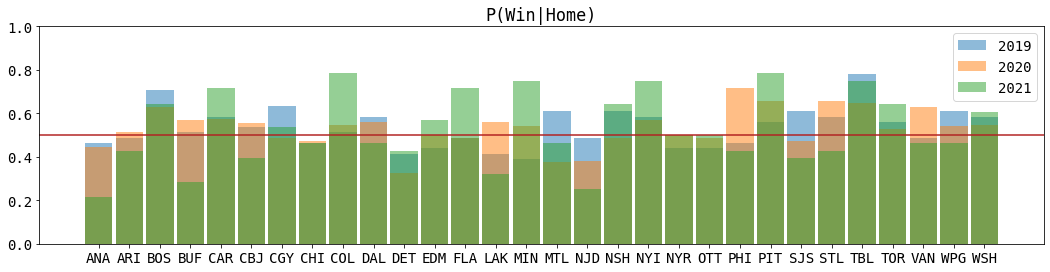

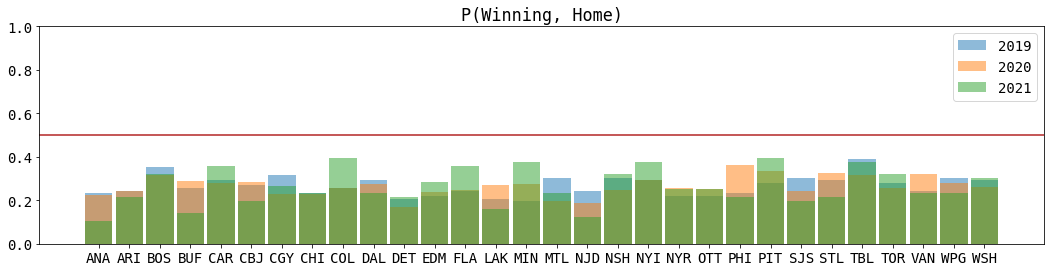

In [143]:

plt.figure(figsize=(18,4))
plt.axhline(0.5, color='firebrick')

for year in dfs.keys():
    p_win_home = [(df[df['Unnamed: 2']!='@']['Unnamed: 6']=='W').mean() for df in dfs[year]]

    plt.bar(teams_found[year], p_win_home, label=str(year), width=0.9, alpha=0.5)
plt.ylim([0,1])
plt.legend()
plt.title('P(Win|Home)')#, fontdict={'fontname':'monospace', 'fontsize':14}) 


plt.figure(figsize=(18,4))
plt.axhline(0.5, color='firebrick')

for year in dfs.keys():
    p_win_home = [(df[df['Unnamed: 2']!='@']['Unnamed: 6']=='W').mean() for df in dfs[year]]
    
    p_winhome = [p*(df['Unnamed: 2']!='@').mean() for p,df in zip(p_win_home, dfs[year])]
    plt.bar(teams_found[year], p_winhome, label=str(year), width=0.9, alpha=0.5)
plt.ylim([0,1])
plt.legend()
plt.title('P(Winning, Home)')#, fontdict={'fontname':'monospace', 'fontsize':14}) 
print()

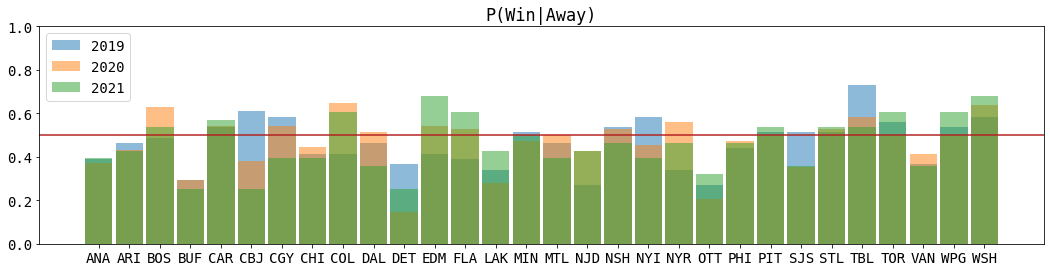

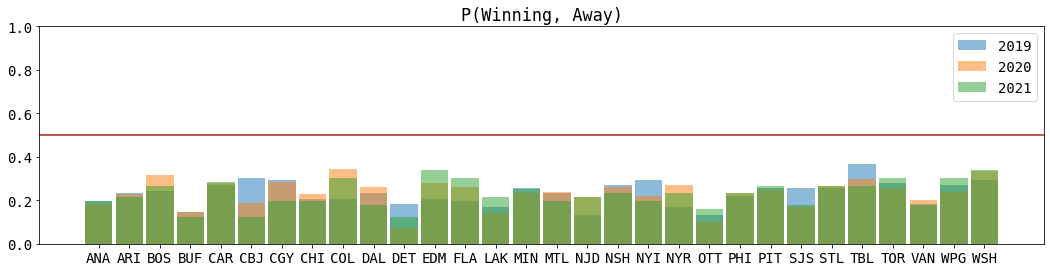

In [144]:
plt.figure(figsize=(18,4))
plt.axhline(0.5, color='firebrick')

for year in dfs.keys():
    p_win_away = [(df[df['Unnamed: 2']=='@']['Unnamed: 6']=='W').mean() for df in dfs[year]]

    plt.bar(teams_found[year], p_win_away, label=str(year), width=0.9, alpha=0.5)
plt.ylim([0,1])
plt.legend()
plt.title('P(Win|Away)')#, fontdict={'fontname':'monospace', 'fontsize':14}) 


plt.figure(figsize=(18,4))
plt.axhline(0.5, color='firebrick')

for year in dfs.keys():
    p_win_away = [(df[df['Unnamed: 2']=='@']['Unnamed: 6']=='W').mean() for df in dfs[year]]
    
    p_winaway = [p*(df['Unnamed: 2']=='@').mean() for p,df in zip(p_win_away, dfs[year])]
    plt.bar(teams_found[year], p_winaway, label=str(year), width=0.9, alpha=0.5)
plt.ylim([0,1])
plt.legend()
plt.title('P(Winning, Away)')#, fontdict={'fontname':'monospace', 'fontsize':14}) 
print()

# Winning and Losing Streaks

In [221]:
streaks_unique = []
for df in dfs[2021]:
    streaks_unique += df['Streak'].unique().tolist()
streaks_unique = np.sort(['%s%0.2i'%(i.split(' ')[0],int(i.split(' ')[1])) for i in np.unique(streaks_unique).tolist()]).tolist()
# lmax = max([int(s.replace('L ', '')) for s in streaks_unique if 'L' in s])
# wmax = max([int(s.replace('W ', '')) for s in streaks_unique if 'W' in s])

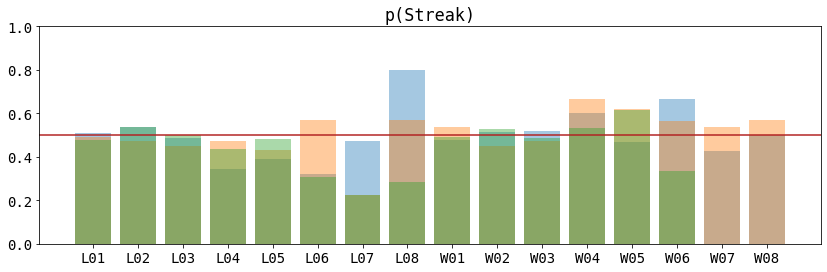

In [246]:
plt.figure(figsize=(14,4))
plt.ylim([0,1])

plt.axhline(0.5, color='firebrick')

for year in dfs.keys():
    df = pd.concat(dfs[year])
    contprob = []
    streaks = []
    for streak in streaks_unique:
        checkfor = 'W'#'L' if 'L' in streak else 'W'
        inds = np.roll(df['Streak'] == streak[:1]+' '+'%0.1i'%int(streak[1:]), 1)
        inds[0] = False
        if inds.sum()>5:
            contprob.append((df[inds]['Unnamed: 6'] == checkfor).mean())
            streaks.append(streak)
    plt.bar(streaks, contprob, label=str(year), alpha=0.4)
    plt.title('p(Streak)')

Text(0.5, 1.0, 'p(Streak)')

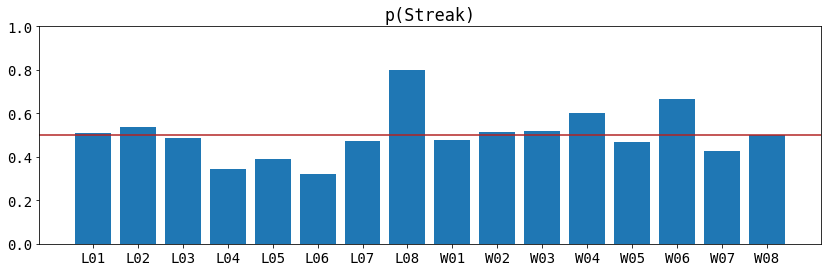

In [218]:
 streak[:1]+' '+streak[1:]

'W 09'

In [166]:
df[np.roll(df['Streak'] == 'W 7', 1)]

,GP,Date,Unnamed: 2,Opponent,GF,GA,Unnamed: 6,Unnamed: 7,W,L,OL,Streak,Att.,LOG,Notes
30,31,2021-03-20,NaN,New York Rangers,1,3,L,NaN,20,7,4,L 1,NaN,2:28,NaN


In [167]:
streaks

array(['W 1', 'W 2', 'L 1', 'L 2', 'W 3', 'L 3', 'L 4', 'W 4', 'W 5',
       'W 6', 'W 7'], dtype=object)

In [163]:
streaks

array(['W 1', 'W 2', 'L 1', 'L 2', 'W 3', 'L 3', 'L 4', 'W 4', 'W 5',
       'W 6', 'W 7'], dtype=object)

In [162]:
streak

'W 7'

In [155]:
df['Streak'] == 'W 1'

0      True
1     False
2     False
3     False
4      True
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13     True
14    False
15    False
16     True
17    False
18     True
19    False
20    False
21    False
22    False
23     True
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31     True
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40     True
41    False
42    False
43    False
44     True
45    False
46     True
47    False
48    False
49    False
50    False
51     True
52    False
53    False
54     True
55    False
Name: Streak, dtype: bool